# Collectibles and triggers dev

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
from westworld.environment import GridEnvironment
from westworld.agents import BaseGridAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation import Simulation
from westworld.colors import *

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# First collectible env

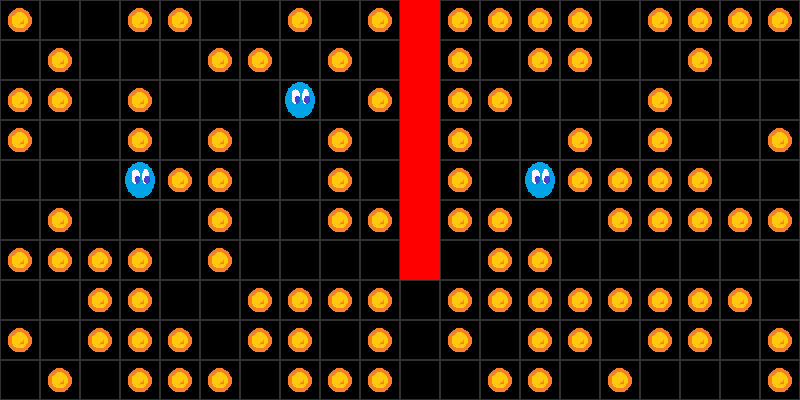

In [107]:
class Agent(BaseGridAgent):
    
    show_search_radius = False
    search_radius_method = "circle"
    
    def init(self):
        self.targets = {}
        self.current_target = None
    
    def step(self):
        
        targets = self.find_in_range(condition = {"collectible":True})
        self.targets.update({t.id:t for t in targets if t.id not in self.targets})
        self.targets = {k:v for k,v in self.targets.items() if k in self.env._objects}
        
        if len(self.targets) == 0:
            self.wander()
            
        else:
            if self.current_target is None:
                self.current_target = list(self.targets.values())[0]
                
            reached_target = self.move_towards(obj = self.current_target,n = 100)
            if reached_target:
                self.current_target = None
                
        
obstacle = BaseObstacle(10,0,1,7,color = RED)

agent_spawner = lambda x,y : Agent(x,y,color = GREEN,search_radius = 2,img_filepath = "sprites/sprite_blob.png",img_transparency = (200, 191, 231))
coll_spawner = lambda x,y : BaseCollectible(x,y,color = WHITE,circle = True,radius = 0.3,img_filepath = "sprites/sprite_ball2.png",img_transparency = (200, 191, 231))
 




# Setup grid
BOX_SIZE = 40
WIDTH = 20
HEIGHT = 10
env = GridEnvironment(WIDTH,HEIGHT,BOX_SIZE,show_grid = True,objects = [obstacle])
env.spawn(agent_spawner,3)
env.spawn(coll_spawner,100)
env.render()
env.get_img()

In [109]:
env.quit()

# Run simulation

In [109]:
sim = Simulation(env,fps = 30)

In [110]:
sim.run_episode(n_steps = 300,save = False,replay=True)

../..\westworld\algorithms\pathfinding\astar.py:141: UserWarning: Giving up on pathfinding too many iterations
  warnings.warn("Giving up on pathfinding too many iterations")


interactive(children=(Play(value=0, description='Press play', interval=200, max=300), Output()), _dom_classes=…

IntSlider(value=0, max=300)

In [155]:
agent1.pos

(3, 2)

In [166]:
agent1.rect

<rect(3, 2, 20, 20)>

In [ ]:
    
#     def render(self,screen = None):
#         ratio = 4
        
#         c,_ = agent1.collides(group,ratio = ratio,method = "circle")
#         if c:
#             color = RED
#         else:
#             color = WHITE
        
#         self.render_circle(radius = ratio,color = color,thickness = 1)
#         self.render_rect(ratio = ratio,color = color,center = True,thickness = 1)
#         super().render(screen)